<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/practice_ensemble(Gradient%20Boosted%20Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

# read data
df = pd.read_csv('data07_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.5,random_state=1)

# **Bagging Methods**

In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# usual knn
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
knn.score(xtest,ytest)
print(knn.score(xtest,ytest))
print(knn.score(xtrain,ytrain))

0.30194445005036563
0.6447443202247629


# **full bagging**

In [15]:
bf = BaggingRegressor(knn,n_estimators=100,max_samples=1.0,max_features=1.0,random_state=0) #bagging을 100개 한다는 의미
bf.fit(xtrain,ytrain)
bf.score(xtrain,ytrain)
bf.score(xtest,ytest)
print(bf.score(xtrain,ytrain),bf.score(xtest,ytest))

0.673701636213444 0.34106207785208675


# **bagging with subsampling and feature randomization**

In [16]:
bf = BaggingRegressor(knn,n_estimators=500,max_samples=0.5,max_features=0.5)
bf.fit(xtrain,ytrain)
bf.score(xtrain,ytrain)
bf.score(xtest,ytest)
print(bf.score(xtrain,ytrain),bf.score(xtest,ytest)) #full baggin에 비해, train값의 성능은 떨어지고, test값의 성능 향상.

0.5806750657724897 0.3649151774124926


# **effect of estimators**

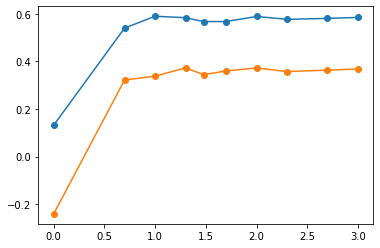

In [17]:
np.random.seed(0)
n_list = [1,5,10,20,30,50,100,200,500,1000]
s = np.zeros((len(n_list),2))
for i in range(len(n_list)):
    bf = BaggingRegressor(knn,n_estimators=n_list[i],max_samples=0.5,max_features=0.5)
    bf.fit(xtrain,ytrain)
    s[i,0] = bf.score(xtrain,ytrain)
    s[i,1] = bf.score(xtest,ytest)
plt.plot(np.log10(n_list),s,marker='o') #파란색이 train, 주황색이 test, 각각의 값의 차이가 계속 유지된다.
#즉, 적정 수준 도달 시 성능의 큰 개선 없음.

# **parameter tunning**

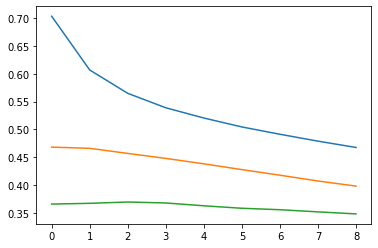

In [18]:
#Bagging 자체에서는 parameter tunning이 없다.
np.random.seed(1)
params = np.arange(2,20,2)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = BaggingRegressor(KNeighborsRegressor(params[i]),n_estimators=200,#base 모델(KNeighborsRegressor(params[i]))을 직접 tunning한다.
                          random_state=0,max_samples=0.5,max_features=0.5,oob_score=True)
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()#cross validation form : cross_val_score
    s[i,2] = f.score(xtest,ytest)
plt.plot(s)
#파란색 : train, 주황색 : cross_validation, 녹색 : test

# **Random Forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(xtrain,ytrain)
yhat_test = rf.predict(xtest)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)

print(rf.score(xtrain,ytrain),rf.score(xtest,ytest))

0.9344222892222186 0.26652306720579266


# **number of features to be chosen**

In [20]:
rf = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt') 
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)
print(rf.score(xtrain,ytrain),rf.score(xtest,ytest))

0.9307158003923464 0.32452479852142846


# **tree size**

In [21]:
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100)#sqrt : 루트, 하나의 트리에 최대 100개의 leaf가능
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)
print(rf.score(xtrain,ytrain),rf.score(xtest,ytest))

0.934844542444828 0.3186232382873758


# **oob score**

In [22]:
#oob score : cross_validation을 빨리 한 것.
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100,
                           oob_score=True)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)
rf.oob_score_  # out-of-bag score

0.5286735733070282

# **parameter tuning using oob scores**

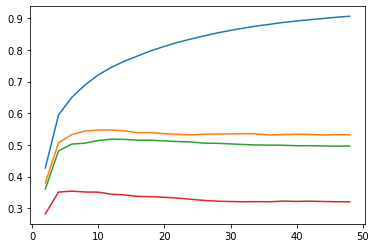

In [23]:
tree_size = np.arange(2,50,2)
s = np.zeros((len(tree_size),4))
for i in range(len(tree_size)):
    rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=tree_size[i],
                           oob_score=True)
    rf.fit(xtrain,ytrain)
    s[i,0] = rf.score(xtrain,ytrain)
    s[i,1] = rf.oob_score_ 
    s[i,2] = cross_val_score(rf,xtrain,ytrain,cv=5).mean()
    s[i,3] = rf.score(xtest,ytest)

plt.plot(tree_size,s)

# **Gradient Boosted Tree**



In [24]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,max_depth=3)
gb.fit(xtrain,ytrain)
yhat_test = gb.predict(xtest)
gb.score(xtrain,ytrain)
gb.score(xtest,ytest)

print(gb.score(xtrain,ytrain), gb.score(xtest,ytest))

0.31841384142607

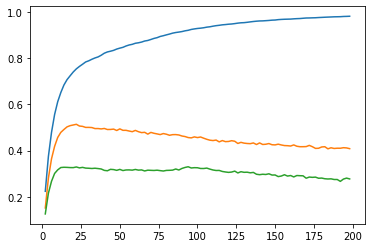

In [25]:
# number of estimators
n_list = np.arange(2,200,2)
s = np.zeros((len(n_list),3))
for i in range(len(n_list)):
    gb = GradientBoostingRegressor(learning_rate=0.1,
                                   n_estimators=n_list[i],max_depth=3)
    gb.fit(xtrain,ytrain)
    s[i,0] = gb.score(xtrain,ytrain)
    s[i,1] = cross_val_score(gb,xtrain,ytrain,cv=5).mean() 
    s[i,2] = gb.score(xtest,ytest)

plt.plot(n_list,s) #파란색인 train set은 성능이 점점 좋아진다.
#그래프를 통해, 20개쯤이 최적의 값을 출력한다는 것을 알 수 있다.
#참고사이트(GradientBoostingClassifier) : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

#성능을 개선하는 방법에 대한 이야기를 다루고 있다. -> python xgboost,lightgbm
#참고사이트(lightgbm) : https://lightgbm.readthedocs.io/en/latest/Python-Intro.html